In [32]:
import pandas as pd
import datetime
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
%matplotlib inline
from matplotlib import style
import matplotlib as mlp

In [33]:
df = pd.read_csv("AAPL.csv")

In [34]:
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
246,2019-09-09,214.839996,216.440002,211.070007,214.169998,214.169998,27309400
247,2019-09-10,213.860001,216.779999,211.710007,216.699997,216.699997,31777900
248,2019-09-11,218.070007,223.710007,217.729996,223.589996,223.589996,44289600
249,2019-09-12,224.800003,226.419998,222.860001,223.089996,223.089996,32226700
250,2019-09-13,220.000000,220.789993,217.020004,218.750000,218.750000,39363200


In [35]:
closing_price = df['Adj Close'] 
moving_avg = closing_price.rolling(window=100).mean()

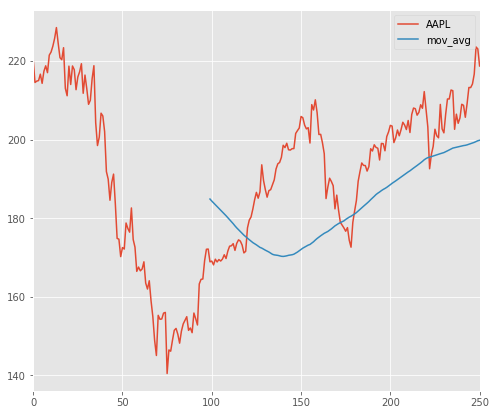

In [36]:
mlp.rc('figure',figsize=(8,7))
mlp.__version__
style.use('ggplot')

closing_price.plot(label='AAPL')
moving_avg.plot(label='mov_avg')
plt.legend()

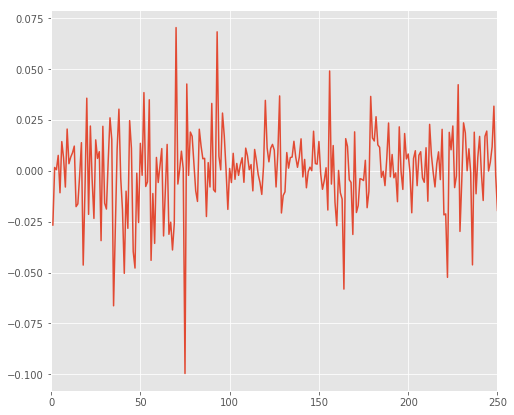

In [37]:
returns = closing_price/closing_price.shift(1) - 1
returns.plot(label = 'return')

In [70]:
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

from sklearn.model_selection import train_test_split

In [75]:
#df.columns

In [58]:
forecast = 30
df['Future Close'] = df[['Adj Close']].shift(-forecast)
df.dropna(inplace=True)

In [59]:
X = df.drop(['Date', 'Open','Low','High','Close','Adj Close', 'Volume'],axis=1)
y = df['Future Close']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [73]:
#Linear Regressor
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

#KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors=2)
knn.fit(X_train,y_train)

#Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_train,y_train)

#Ridge
ridge = Ridge(alpha=0.1)
ridge.fit(X_train,y_train)

#Quadratic
quad1 = make_pipeline(PolynomialFeatures(2), Ridge())
quad1.fit(X_train,y_train)

Pipeline(memory=None,
     steps=[('polynomialfeatures', PolynomialFeatures(degree=2, include_bias=True, interaction_only=False)), ('ridge', Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001))])

In [74]:
#Linear Regressor
lr_model_confidence = lr_model.score(X_test,y_test)
print("Linear Regression Confidence: ", lr_model_confidence * 100, '%')

#KNeighborsRegressor
knn_confidence = knn.score(X_test,y_test)
print("KNN Confidence: ",knn_confidence*100,'%')

#Lasso
lasso_confidence = lasso.score(X_test,y_test)
print("Lasso Confidence: ",lasso_confidence*100,'%')

#Ridge
ridge_confidence = ridge.score(X_test,y_test)
print("Ridge Confidence: ",ridge_confidence*100,'%')

#Quadratic
quad1_confidence = quad1.score(X_test,y_test)
print("Quadratic: ",quad1_confidence*100,'%')

Linear Regression Confidence:  100.0 %
KNN Confidence:  99.9549238142112 %
Lasso Confidence:  99.9999930150729 %
Ridge Confidence:  99.99999999970548 %
Quadratic:  99.99999080233583 %
